# Analyzing the Models 
### Ranking the models for every weightclass
### Ranking the feature importances for every weightclass

In [1]:
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib

# Package to implement AdaBoost
import sklearn
from sklearn.ensemble import AdaBoostClassifier

# Package to implement Grid Search Cross Validation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

# Package for generating confusion matrix
from sklearn.metrics import plot_confusion_matrix

# Package for generating classification report
from sklearn.metrics import classification_report

# Package to record time
import time

# Package for Data pretty printer
from pprint import pprint

%matplotlib inline

import pickle


# Random Forest

In [2]:
flyweight_randomforest_model = pickle.load(open('flyweight_randomforest_pickle.sav', 'rb'))
bantamweight_randomforest_model = pickle.load(open('bantamweight_randomforest_pickle.sav', 'rb'))
featherweight_randomforest_model = pickle.load(open('featherweight_randomforest_pickle.sav', 'rb'))
lightweight_randomforest_model = pickle.load(open('lightweight_randomforest_pickle.sav', 'rb'))
welterweight_randomforest_model = pickle.load(open('welterweight_randomforest_pickle.sav', 'rb'))
middleweight_randomforest_model = pickle.load(open('middleweight_randomforest_pickle.sav', 'rb'))
lightheavyweight_randomforest_model = pickle.load(open('lightheavyweight_randomforest_pickle.sav', 'rb'))
heavyweight_randomforest_model = pickle.load(open('heavyweight_randomforest_pickle.sav', 'rb'))

#CREATE LISTS TO STORE F1 SCORE


rf_scores_f1 = []


flyweight_rf_imp = 1
bantamweight_rf_imp = 1
featherweight_rf_imp = 1
lightweight_rf_imp = 1
welterweight_rf_imp = 1
middleweight_rf_imp = 1
lightheavyweight_rf_imp = 1
heavyweight_rf_imp = 1

C:\Users\Michael Cassetti\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.23.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
C:\Users\Michael Cassetti\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.23.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
C:\Users\Michael Cassetti\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator GridSearchCV from version 0.23.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [3]:
# MAKING ALL MY LISTS TO LOOP THROUGH

stest_Xs = ['flyweight_test_x.csv','bantamweight_test_x.csv','featherweight_test_x.csv','lightweight_test_x.csv','welterweight_test_x.csv','middleweight_test_x.csv','lightheavyweight_test_x.csv','heavyweight_test_x.csv']
stest_ys = ['flyweight_test_y.csv','bantamweight_test_y.csv','featherweight_test_y.csv','lightweight_test_y.csv','welterweight_test_y.csv','middleweight_test_y.csv','lightheavyweight_test_y.csv','heavyweight_test_y.csv']



random_forest_imp = [flyweight_rf_imp,bantamweight_rf_imp,featherweight_rf_imp,lightweight_rf_imp,welterweight_rf_imp,middleweight_rf_imp,lightheavyweight_rf_imp,heavyweight_rf_imp]

random_forest_models = [flyweight_randomforest_model,bantamweight_randomforest_model,featherweight_randomforest_model,lightweight_randomforest_model,welterweight_randomforest_model,middleweight_randomforest_model,lightheavyweight_randomforest_model,heavyweight_randomforest_model]


In [4]:
count = 0

for model in random_forest_models:
    
    file1 = stest_Xs[count]
    file2 = stest_ys[count]
    test_X = pd.read_csv(file1)
    test_y = pd.read_csv(file2)
    
    # Predictions on test set
    y_pred = model.predict(test_X)
    test_y = test_y['Winner']
    
    # Predictions on test set
    y_pred = model.predict(test_X)

    # Getting prediction probabilites
    prob = model.predict_proba(test_X)

    # Printing prediction results
    result = pd.DataFrame({'Actual': test_y, 'Predicted': y_pred})

    # Creating columns for rejection and acceptance prob.
    result[['Prob. of 0','Prob. of 1']] = pd.DataFrame(prob.tolist(), index = result.index)

    # Saving dataframe as a csv file
    #result.to_csv('Prediction Results.csv', index = False)

    # Storing importance values from the best fit model
    importance = model.best_estimator_.feature_importances_

    # Displaying feature importance as a dataframe
    feature_imp = pd.DataFrame(list(zip(test_X.columns, importance)),
                   columns = ['Feature', 'Importance'])

    feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)
    
    f1a = model.best_score_
    rf_scores_f1.append(f1a)
    
    random_forest_imp[count] = feature_imp.sort_values('Feature')
    print(random_forest_imp[count])
    
    count += 1

                 Feature  Importance
51          B_Height_cms    0.007121
34           B_Reach_cms    0.014142
64              B_Stance    0.002571
61          B_Weight_lbs    0.004164
1                  B_age    0.037094
..                   ...         ...
70            title_bout    0.000167
27       total_round_dif    0.016364
49  total_title_bout_dif    0.007856
44               win_dif    0.009580
40        win_streak_dif    0.010766

[76 rows x 2 columns]
                 Feature  Importance
40          B_Height_cms    0.008977
26           B_Reach_cms    0.014232
58              B_Stance    0.003976
66          B_Weight_lbs    0.001678
27                 B_age    0.013173
..                   ...         ...
68            title_bout    0.000615
24       total_round_dif    0.015829
57  total_title_bout_dif    0.004048
43               win_dif    0.007805
42        win_streak_dif    0.007918

[76 rows x 2 columns]
                 Feature  Importance
39          B_Height_cms    0

In [5]:
rf_scores_f1

[0.5332521242198661,
 0.5935007049466665,
 0.5806372042728811,
 0.6913693121884722,
 0.5998611150197636,
 0.5510105660182386,
 0.6317312448548146,
 0.588449443538357]

In [6]:
flyweight_rf_imp = random_forest_imp[0]
bantamweight_rf_imp = random_forest_imp[1]
featherweight_rf_imp = random_forest_imp[2]
lightweight_rf_imp = random_forest_imp[3]
welterweight_rf_imp = random_forest_imp[4]
middleweight_rf_imp = random_forest_imp[5]
lightheavyweight_rf_imp = random_forest_imp[6]
heavyweight_rf_imp = random_forest_imp[7]

In [7]:
flyweight_rf_imp

,Feature,Importance
51,B_Height_cms,0.007121
34,B_Reach_cms,0.014142
64,B_Stance,0.002571
61,B_Weight_lbs,0.004164
1,B_age,0.037094
...,...,...
70,title_bout,0.000167
27,total_round_dif,0.016364
49,total_title_bout_dif,0.007856
44,win_dif,0.009580


# DECISION TREES

In [8]:
flyweight_decisiontrees_model = pickle.load(open('flyweight_tree_pickle.sav', 'rb'))
bantamweight_decisiontrees_model = pickle.load(open('bantamweight_tree_pickle.sav', 'rb'))
featherweight_decisiontrees_model = pickle.load(open('featherweight_tree_pickle.sav', 'rb'))
lightweight_decisiontrees_model = pickle.load(open('lightweight_tree_pickle.sav', 'rb'))
welterweight_decisiontrees_model = pickle.load(open('welterweight_tree_pickle.sav', 'rb'))
middleweight_decisiontrees_model = pickle.load(open('middleweight_tree_pickle.sav', 'rb'))
lightheavyweight_decisiontrees_model = pickle.load(open('light_heavyweight_tree_pickle.sav', 'rb'))
heavyweight_decisiontrees_model = pickle.load(open('heavyweight_tree_pickle.sav', 'rb'))


dt_scores_f1 = []


flyweight_dt_imp = 1
bantamweight_dt_imp = 1
featherweight_dt_imp = 1
lightweight_dt_imp = 1
welterweight_dt_imp = 1
middleweight_dt_imp = 1
lightheavyweight_dt_imp = 1
heavyweight_dt_imp = 1

In [9]:
# MAKING ALL MY LISTS TO LOOP THROUGH

stest_Xs = ['flyweight_test_x.csv','bantamweight_test_x.csv','featherweight_test_x.csv','lightweight_test_x.csv','welterweight_test_x.csv','middleweight_test_x.csv','lightheavyweight_test_x.csv','heavyweight_test_x.csv']
stest_ys = ['flyweight_test_y.csv','bantamweight_test_y.csv','featherweight_test_y.csv','lightweight_test_y.csv','welterweight_test_y.csv','middleweight_test_y.csv','lightheavyweight_test_y.csv','heavyweight_test_y.csv']



decision_trees_imp = [flyweight_dt_imp,bantamweight_dt_imp,featherweight_dt_imp,lightweight_dt_imp,welterweight_dt_imp,middleweight_dt_imp,lightheavyweight_dt_imp,heavyweight_dt_imp]

decision_trees_models = [flyweight_decisiontrees_model,bantamweight_decisiontrees_model,featherweight_decisiontrees_model,lightweight_decisiontrees_model,welterweight_decisiontrees_model,middleweight_decisiontrees_model,lightheavyweight_decisiontrees_model,heavyweight_decisiontrees_model]


In [10]:
count = 0

for model in decision_trees_models:
    
    file1 = stest_Xs[count]
    file2 = stest_ys[count]
    test_X = pd.read_csv(file1)
    test_y = pd.read_csv(file2)
    
    # Predictions on test set
    y_pred = model.predict(test_X)
    test_y = test_y['Winner']
    
    # Predictions on test set
    y_pred = model.predict(test_X)

    # Getting prediction probabilites
    prob = model.predict_proba(test_X)

    # Printing prediction results
    result = pd.DataFrame({'Actual': test_y, 'Predicted': y_pred})

    # Creating columns for rejection and acceptance prob.
    result[['Prob. of 0','Prob. of 1']] = pd.DataFrame(prob.tolist(), index = result.index)

    # Saving dataframe as a csv file
    #result.to_csv('Prediction Results.csv', index = False)

    # Storing importance values from the best fit model
    importance = model.best_estimator_.feature_importances_

    # Displaying feature importance as a dataframe
    feature_imp = pd.DataFrame(list(zip(test_X.columns, importance)),
                   columns = ['Feature', 'Importance'])

    feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)
    
    f1b = model.best_score_
    dt_scores_f1.append(f1b)
    
    decision_trees_imp[count] = feature_imp.sort_values('Feature')
    print(decision_trees_imp[count])
    
    count += 1

                 Feature  Importance
69          B_Height_cms    0.000000
67           B_Reach_cms    0.000000
70              B_Stance    0.000000
60          B_Weight_lbs    0.000000
1                  B_age    0.189216
..                   ...         ...
54            title_bout    0.000000
36       total_round_dif    0.000000
35  total_title_bout_dif    0.000000
20               win_dif    0.000000
13        win_streak_dif    0.000000

[76 rows x 2 columns]
                 Feature  Importance
69          B_Height_cms         0.0
67           B_Reach_cms         0.0
70              B_Stance         0.0
60          B_Weight_lbs         0.0
9                  B_age         0.0
..                   ...         ...
55            title_bout         0.0
37       total_round_dif         0.0
36  total_title_bout_dif         0.0
21               win_dif         0.0
16        win_streak_dif         0.0

[76 rows x 2 columns]
                 Feature  Importance
6           B_Height_cms    0

In [11]:
flyweight_dt_imp = decision_trees_imp[0]
bantamweight_dt_imp = decision_trees_imp[1]
featherweight_dt_imp = decision_trees_imp[2]
lightweight_dt_imp = decision_trees_imp[3]
welterweight_dt_imp = decision_trees_imp[4]
middleweight_dt_imp = decision_trees_imp[5]
lightheavyweight_dt_imp = decision_trees_imp[6]
heavyweight_dt_imp = decision_trees_imp[7]

In [12]:
bantamweight_dt_imp

,Feature,Importance
69,B_Height_cms,0.0
67,B_Reach_cms,0.0
70,B_Stance,0.0
60,B_Weight_lbs,0.0
9,B_age,0.0
...,...,...
55,title_bout,0.0
37,total_round_dif,0.0
36,total_title_bout_dif,0.0
21,win_dif,0.0


In [13]:
dt_scores_f1

[0.6461102665450491,
 0.6385930755314816,
 0.6206197003908784,
 0.6737174269333812,
 0.6223148024775542,
 0.5802911152281138,
 0.6292517140397988,
 0.6292517140397988]

# BOOSTING

In [14]:
flyweight_boosting_model = pickle.load(open('flyweight_boosting_pickle.sav', 'rb'))
bantamweight_boosting_model = pickle.load(open('bantamweight_boosting_pickle.sav', 'rb'))
featherweight_boosting_model = pickle.load(open('featherweight_boosting_pickle.sav', 'rb'))
lightweight_boosting_model = pickle.load(open('lightweight_boosting_pickle.sav', 'rb'))
welterweight_boosting_model = pickle.load(open('welterweight_boosting_pickle.sav', 'rb'))
middleweight_boosting_model = pickle.load(open('middleweight_boosting_pickle.sav', 'rb'))
lightheavyweight_boosting_model = pickle.load(open('lightheavyweight_boosting_pickle.sav', 'rb'))
heavyweight_boosting_model = pickle.load(open('heavyweight_boosting_pickle.sav', 'rb'))


b_scores_f1 = []


flyweight_b_imp = 1
bantamweight_b_imp = 1
featherweight_b_imp = 1
lightweight_b_imp = 1
welterweight_b_imp = 1
middleweight_b_imp = 1
lightheavyweight_b_imp = 1
heavyweight_b_imp = 1

C:\Users\Michael Cassetti\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator AdaBoostClassifier from version 0.23.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
C:\Users\Michael Cassetti\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.23.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
C:\Users\Michael Cassetti\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator GridSearchCV from version 0.23.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [15]:
# MAKING ALL MY LISTS TO LOOP THROUGH

stest_Xs = ['flyweight_test_x.csv','bantamweight_test_x.csv','featherweight_test_x.csv','lightweight_test_x.csv','welterweight_test_x.csv','middleweight_test_x.csv','lightheavyweight_test_x.csv','heavyweight_test_x.csv']
stest_ys = ['flyweight_test_y.csv','bantamweight_test_y.csv','featherweight_test_y.csv','lightweight_test_y.csv','welterweight_test_y.csv','middleweight_test_y.csv','lightheavyweight_test_y.csv','heavyweight_test_y.csv']



boosting_imp = [flyweight_b_imp,bantamweight_b_imp,featherweight_b_imp,lightweight_b_imp,welterweight_b_imp,middleweight_b_imp,lightheavyweight_b_imp,heavyweight_b_imp]

boosting_models = [flyweight_boosting_model,bantamweight_boosting_model,featherweight_boosting_model,lightweight_boosting_model,welterweight_boosting_model,middleweight_boosting_model,lightheavyweight_boosting_model,heavyweight_boosting_model]


In [16]:
count = 0

for model in boosting_models:
    
    file1 = stest_Xs[count]
    file2 = stest_ys[count]
    test_X = pd.read_csv(file1)
    test_y = pd.read_csv(file2)
    
    # Predictions on test set
    y_pred = model.predict(test_X)
    test_y = test_y['Winner']
    
    # Predictions on test set
    y_pred = model.predict(test_X)

    # Getting prediction probabilites
    prob = model.predict_proba(test_X)

    # Printing prediction results
    result = pd.DataFrame({'Actual': test_y, 'Predicted': y_pred})

    # Creating columns for rejection and acceptance prob.
    result[['Prob. of 0','Prob. of 1']] = pd.DataFrame(prob.tolist(), index = result.index)

    # Saving dataframe as a csv file
    #result.to_csv('Prediction Results.csv', index = False)

    # Storing importance values from the best fit model
    importance = model.best_estimator_.feature_importances_

    # Displaying feature importance as a dataframe
    feature_imp = pd.DataFrame(list(zip(test_X.columns, importance)),
                   columns = ['Feature', 'Importance'])

    feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)
    
    f1c = model.best_score_
    b_scores_f1.append(f1c)
    
    boosting_imp[count] = feature_imp.sort_values('Feature')
    print(boosting_imp[count])
    
    count += 1

                 Feature  Importance
35          B_Height_cms    0.007444
73           B_Reach_cms    0.000000
74              B_Stance    0.000000
72          B_Weight_lbs    0.000000
4                  B_age    0.037425
..                   ...         ...
58            title_bout    0.000000
24       total_round_dif    0.017538
52  total_title_bout_dif    0.000000
60               win_dif    0.000000
44        win_streak_dif    0.002833

[76 rows x 2 columns]
                 Feature  Importance
28          B_Height_cms    0.012983
10           B_Reach_cms    0.032377
26              B_Stance    0.017115
68          B_Weight_lbs    0.000000
34                 B_age    0.009221
..                   ...         ...
60            title_bout    0.000000
44       total_round_dif    0.004688
55  total_title_bout_dif    0.000000
35               win_dif    0.009101
18        win_streak_dif    0.022604

[76 rows x 2 columns]
                 Feature  Importance
64          B_Height_cms    0

In [17]:
flyweight_b_imp = boosting_imp[0]
bantamweight_b_imp = boosting_imp[1]
featherweight_b_imp = boosting_imp[2]
lightweight_b_imp = boosting_imp[3]
welterweight_b_imp = boosting_imp[4]
middleweight_b_imp = boosting_imp[5]
lightheavyweight_b_imp = boosting_imp[6]
heavyweight_b_imp = boosting_imp[7]

In [18]:
b_scores_f1

[0.5675695138195138,
 0.5388134514206298,
 0.5919981519981521,
 0.6130853061227105,
 0.6220761154634069,
 0.5347327962798307,
 0.6898302509736355,
 0.5769893294787872]

# FLYWEIGHT

In [19]:


flyweight_df = flyweight_rf_imp + flyweight_dt_imp + flyweight_b_imp
flyweight_df['Feature'] = flyweight_rf_imp['Feature']

flyweight_df['Importance'] = flyweight_df['Importance'] / sum(flyweight_df['Importance'])
flyweight_df

,Feature,Importance
0,b_sub_odds,0.181769
1,B_age,0.094701
2,b_dec_odds,0.084748
3,B_odds,0.071925
4,avg_sub_att_dif,0.044649
...,...,...
71,R_win_by_TKO_Doctor_Stoppage,0.000000
72,B_win_by_TKO_Doctor_Stoppage,0.000000
73,R_draw,0.000000
74,B_win_by_Decision_Majority,0.000000


In [20]:
methods = ['Random Forest','Decision Trees','Boosting']
flyweight_methods = [rf_scores_f1[0],dt_scores_f1[0],b_scores_f1[0]]
methodsflyweight = [methods,flyweight_methods]

flyweightf1 = pd.DataFrame(methodsflyweight, index=['Flyweight Method', 'F1 Score']).T
flyweightf1

,Flyweight Method,F1 Score
0,Random Forest,0.533252
1,Decision Trees,0.64611
2,Boosting,0.56757


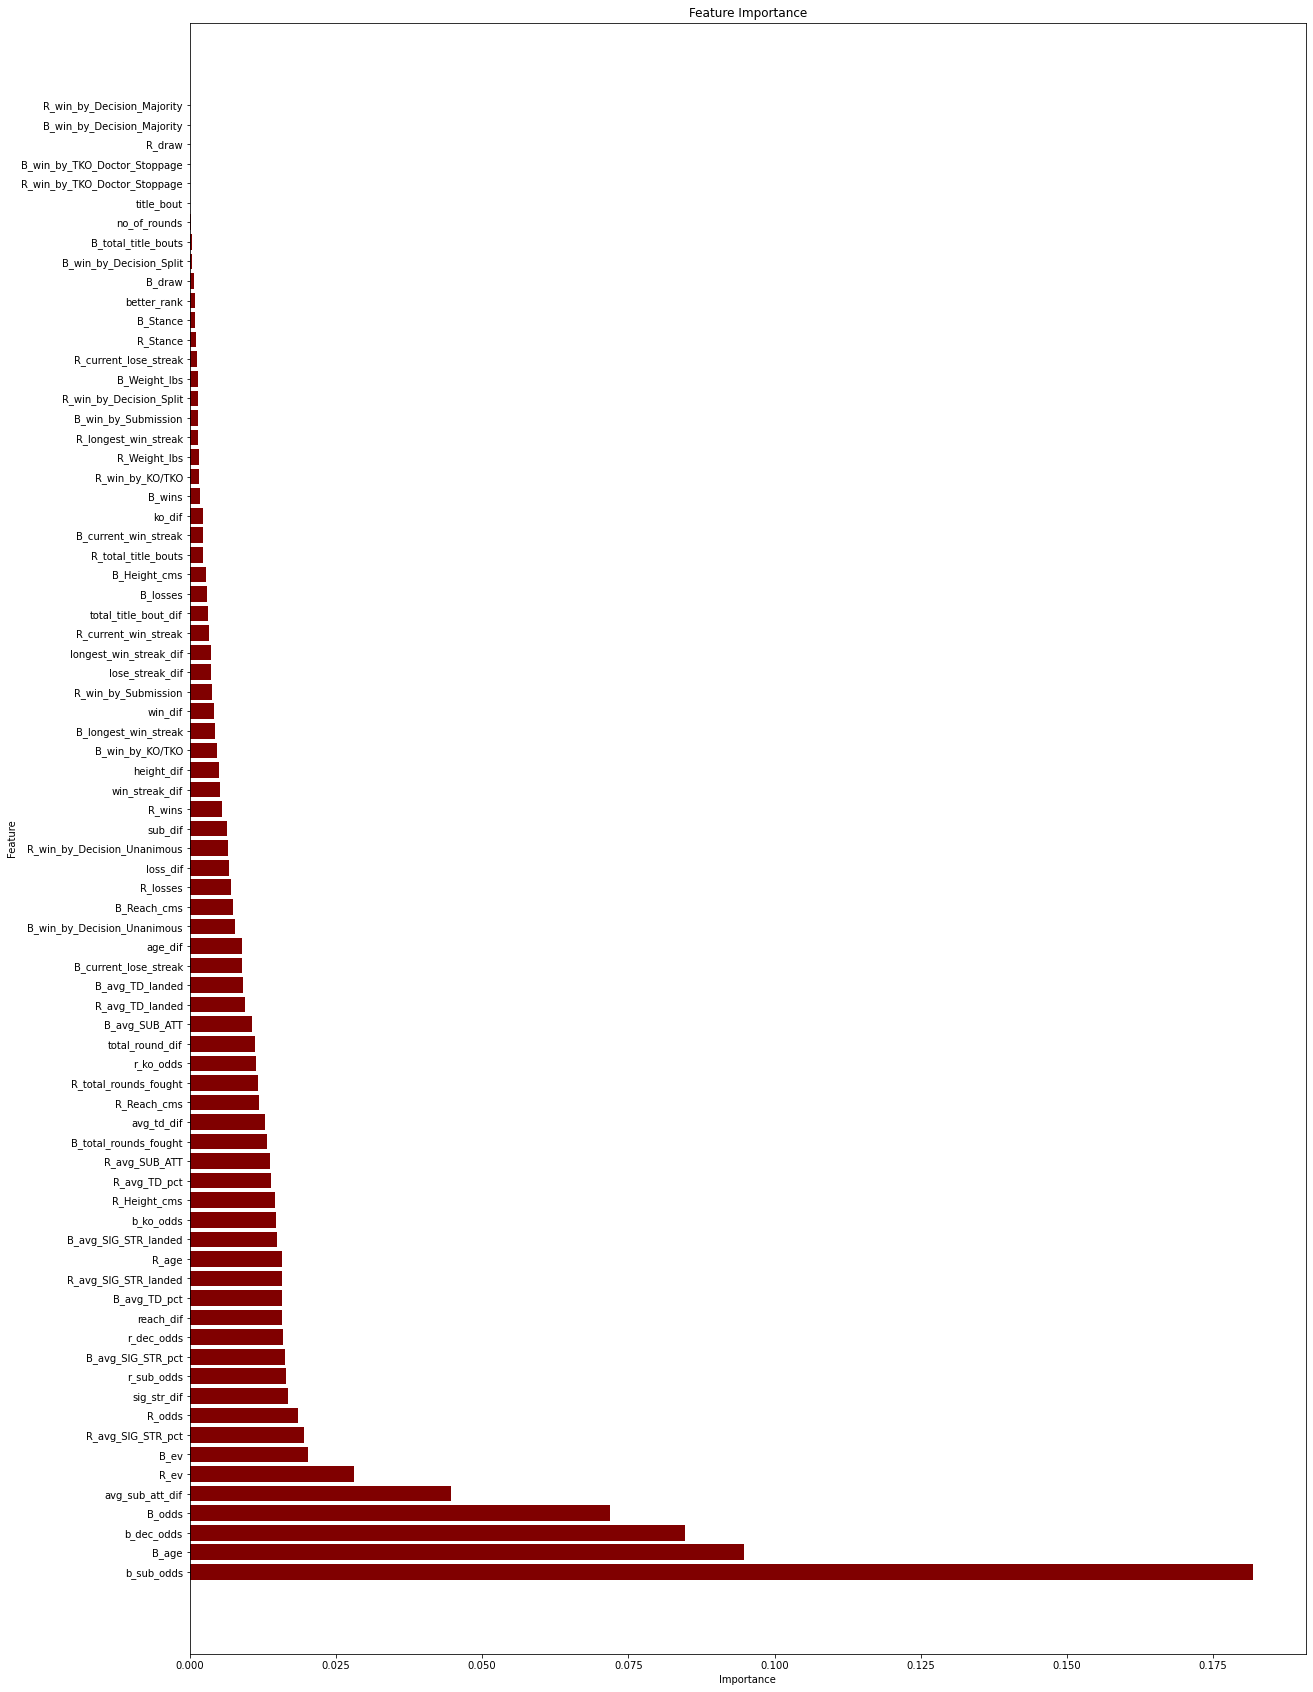

In [21]:
# Bar plot 
plt.figure(figsize=(20, 30))
plt.barh(flyweight_df['Feature'], flyweight_df['Importance'], color ='maroon')

plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");
#plt.savefig('bantamweight_boosting_plot.png')

# BANTAMWEIGHT

In [22]:
bantamweight_df = bantamweight_rf_imp + bantamweight_dt_imp + bantamweight_b_imp
bantamweight_df['Feature'] = bantamweight_rf_imp['Feature']
bantamweight_df['Importance'] = bantamweight_df['Importance'] / sum(bantamweight_df['Importance'])
bantamweight_df

,Feature,Importance
0,B_ev,0.177150
1,B_odds,0.084033
2,R_ev,0.080657
3,R_odds,0.057339
4,b_dec_odds,0.054650
...,...,...
71,R_draw,0.000067
72,R_win_by_TKO_Doctor_Stoppage,0.000000
73,B_win_by_TKO_Doctor_Stoppage,0.000000
74,B_draw,0.000000


In [23]:
bantamweight_methods = [rf_scores_f1[1],dt_scores_f1[2],b_scores_f1[3]]
methodsflyweight = [methods,bantamweight_methods]

bantamweightf1 = pd.DataFrame(methodsflyweight, index=['Bantamweight Method', 'F1 Score']).T
bantamweightf1

,Bantamweight Method,F1 Score
0,Random Forest,0.593501
1,Decision Trees,0.62062
2,Boosting,0.613085


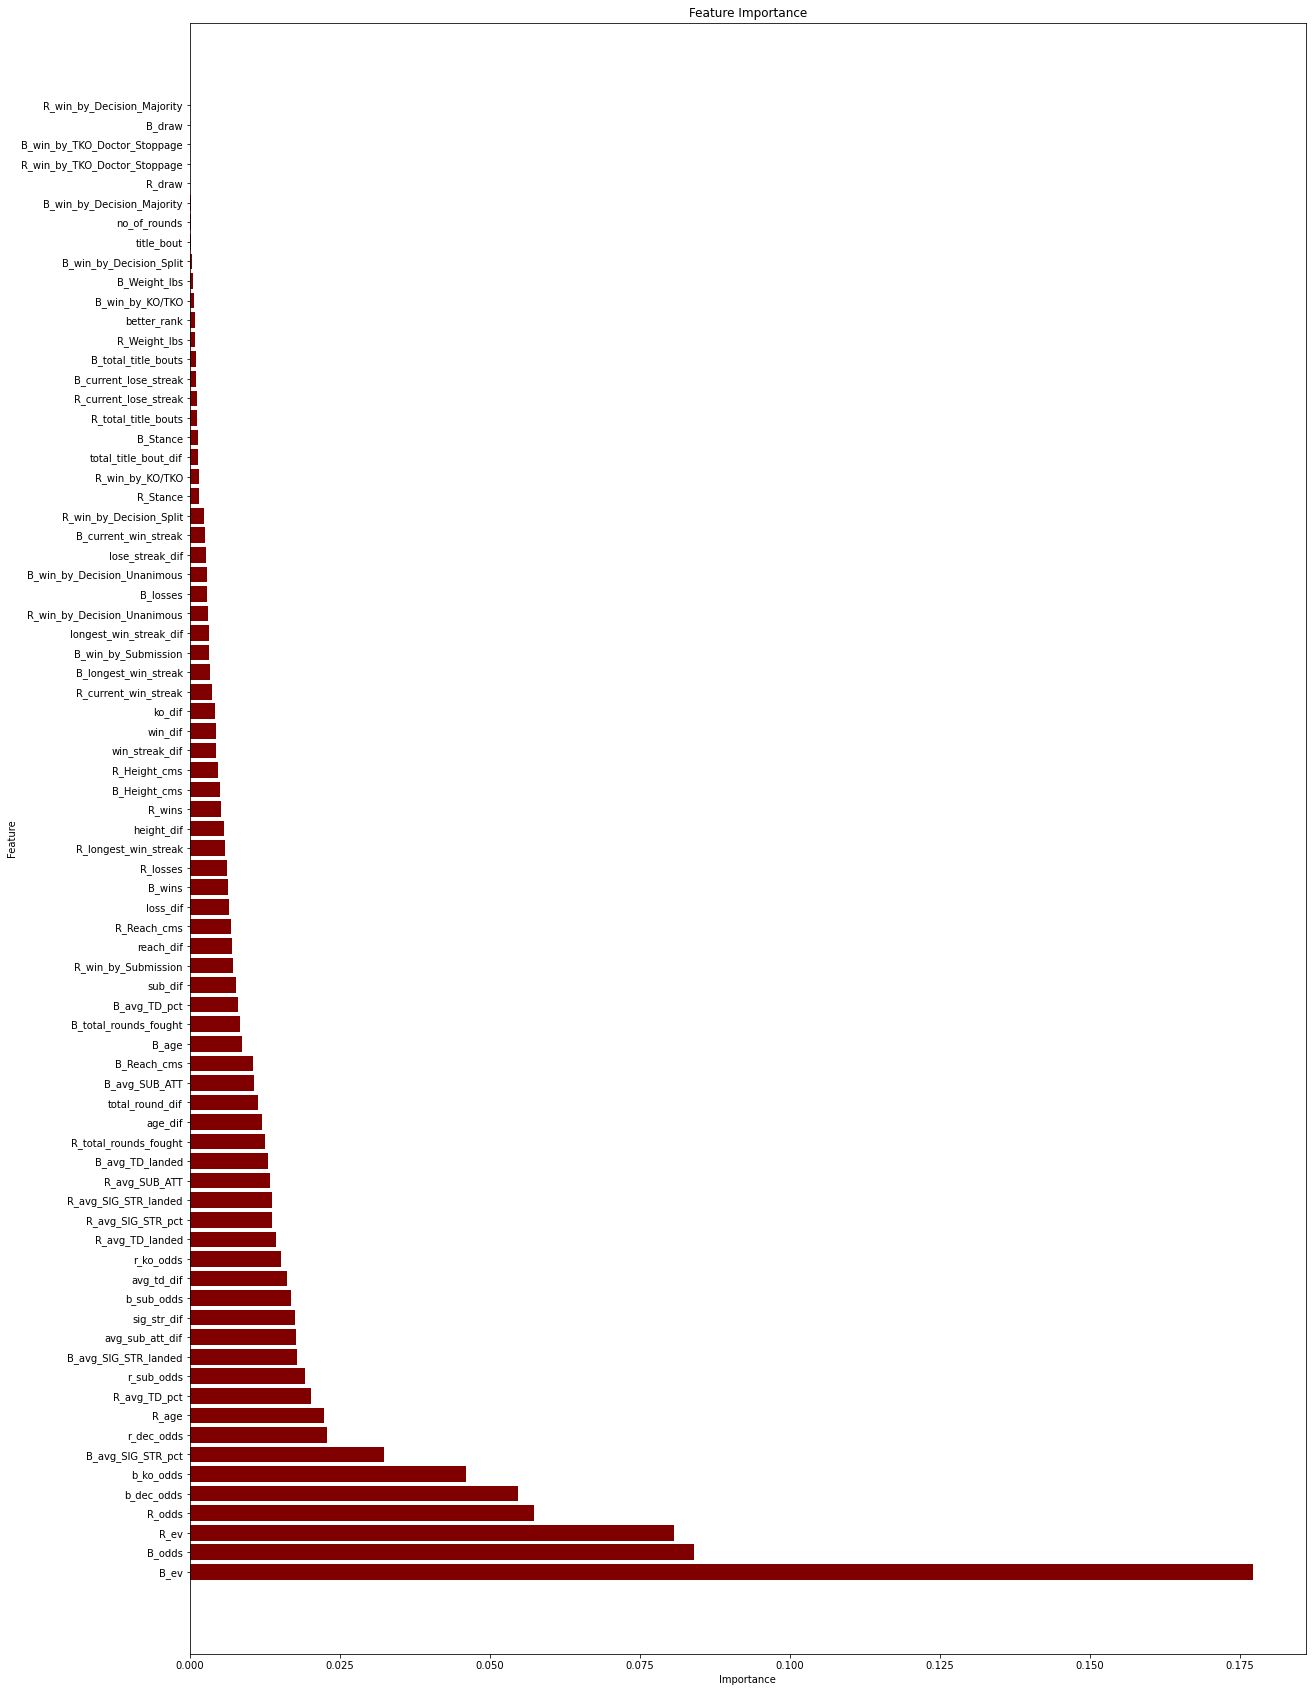

In [24]:
# Bar plot 
plt.figure(figsize=(20, 30))
plt.barh(bantamweight_df['Feature'], bantamweight_df['Importance'], color ='maroon')

plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");
#plt.savefig('bantamweight_boosting_plot.png')

# FEATHERWEIGHT

In [25]:
featherweight_df = featherweight_rf_imp + featherweight_dt_imp + featherweight_b_imp
featherweight_df['Feature'] = featherweight_rf_imp['Feature']
featherweight_df['Importance'] = featherweight_df['Importance'] / sum(featherweight_df['Importance'])
featherweight_df

,Feature,Importance
0,R_ev,0.147849
1,R_odds,0.107234
2,B_ev,0.089180
3,B_odds,0.067413
4,b_dec_odds,0.059817
...,...,...
71,R_win_by_TKO_Doctor_Stoppage,0.000000
72,B_draw,0.000000
73,B_win_by_Decision_Majority,0.000000
74,R_win_by_Decision_Majority,0.000000


In [26]:
featherweight_methods = [rf_scores_f1[2],dt_scores_f1[2],b_scores_f1[2]]
methodsfeatherweight = [methods,featherweight_methods]

featherweightf1 = pd.DataFrame(methodsfeatherweight, index=['Featherweight Method', 'F1 Score']).T
featherweightf1

,Featherweight Method,F1 Score
0,Random Forest,0.580637
1,Decision Trees,0.62062
2,Boosting,0.591998


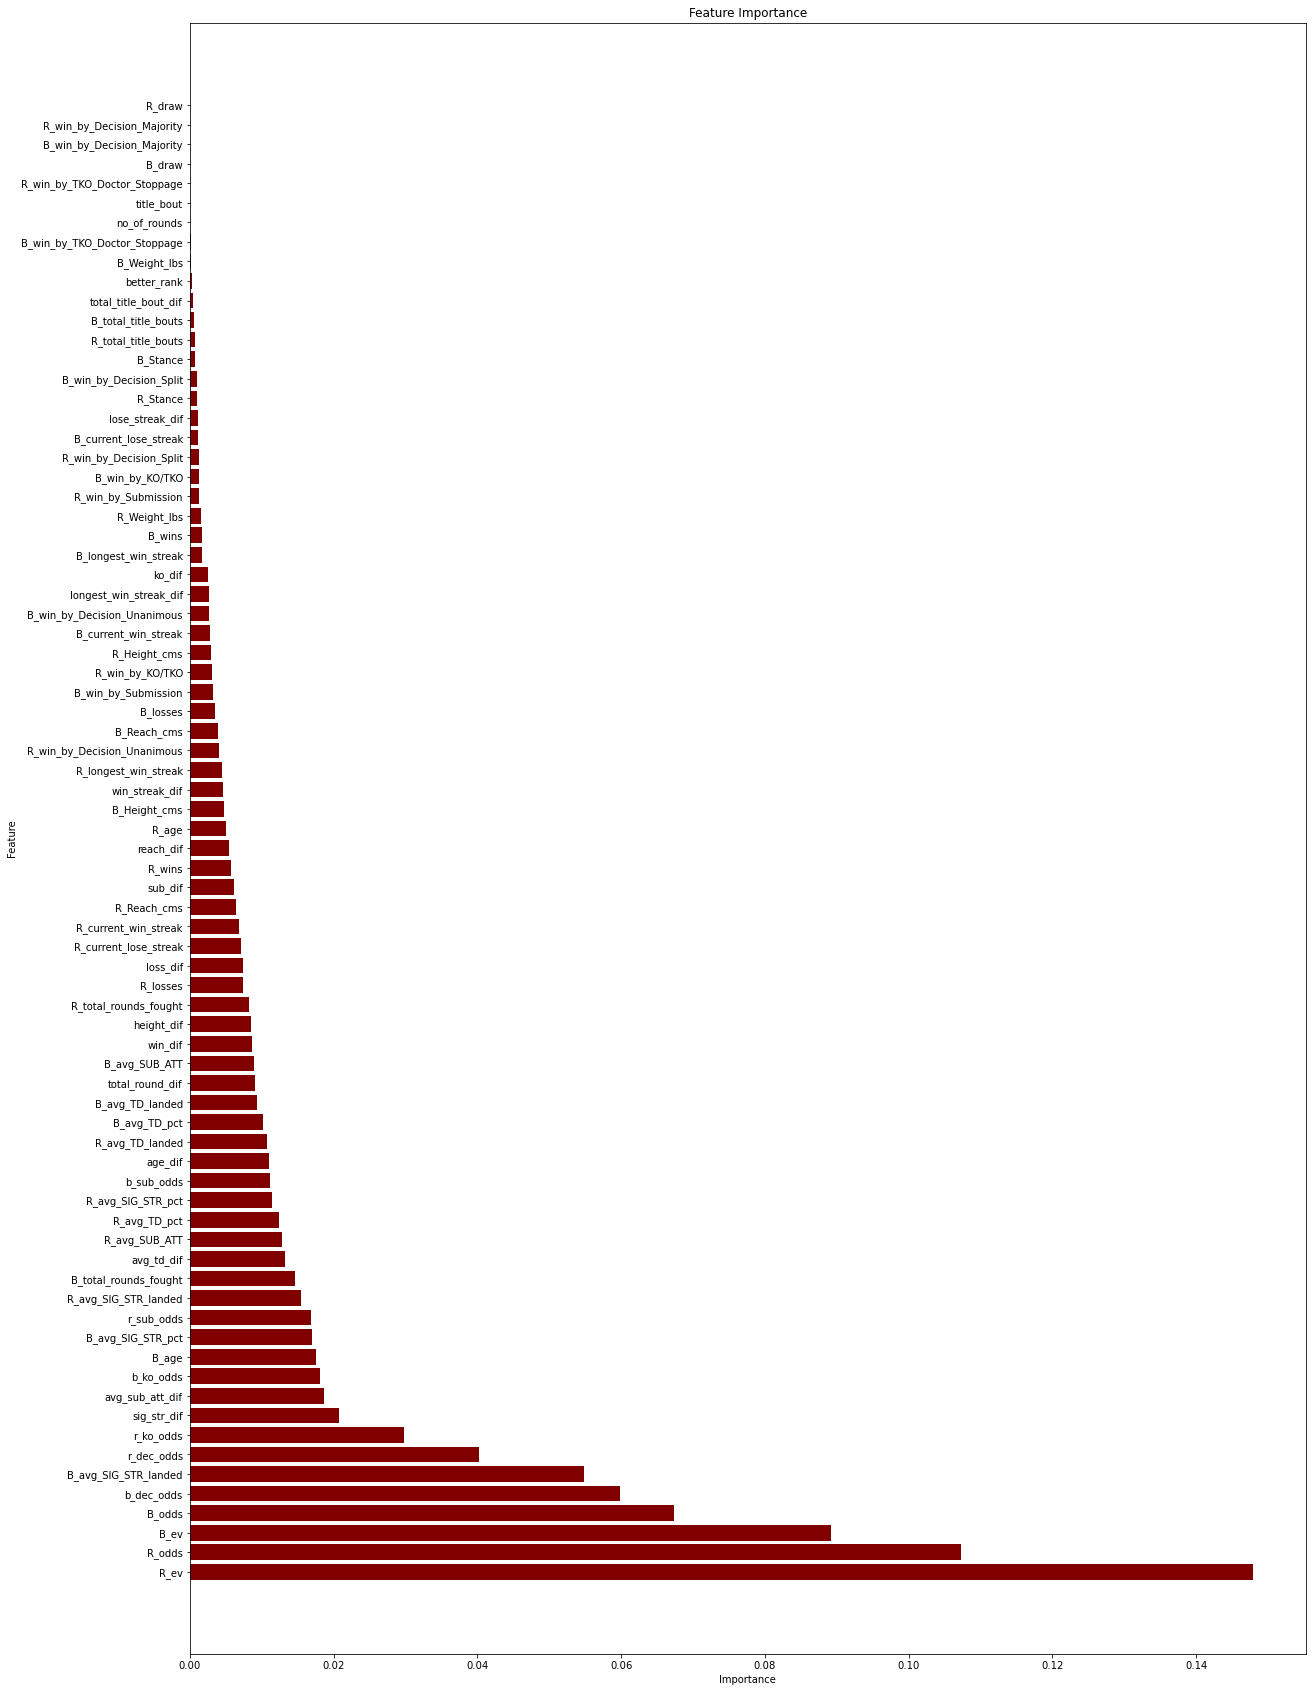

In [27]:
# Bar plot 
plt.figure(figsize=(20, 30))
plt.barh(featherweight_df['Feature'], featherweight_df['Importance'], color ='maroon')

plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");
#plt.savefig('bantamweight_boosting_plot.png')

# LIGHTWEIGHT

In [28]:
lightweight_df = lightweight_rf_imp + lightweight_dt_imp + lightweight_b_imp
lightweight_df['Feature'] = lightweight_rf_imp['Feature']
lightweight_df['Importance'] = lightweight_df['Importance'] / sum(lightweight_df['Importance'])
lightweight_df

,Feature,Importance
0,R_odds,0.337615
1,B_odds,0.072419
2,R_ev,0.036126
3,B_ev,0.033534
4,r_ko_odds,0.026620
...,...,...
71,no_of_rounds,0.000181
72,B_draw,0.000128
73,B_win_by_Decision_Majority,0.000081
74,title_bout,0.000075


In [29]:
lightweight_methods = [rf_scores_f1[3],dt_scores_f1[3],b_scores_f1[3]]
methodslightweight = [methods,lightweight_methods]

lightweightf1 = pd.DataFrame(methodslightweight, index=['Lightweight Method', 'F1 Score']).T
lightweightf1

,Lightweight Method,F1 Score
0,Random Forest,0.691369
1,Decision Trees,0.673717
2,Boosting,0.613085


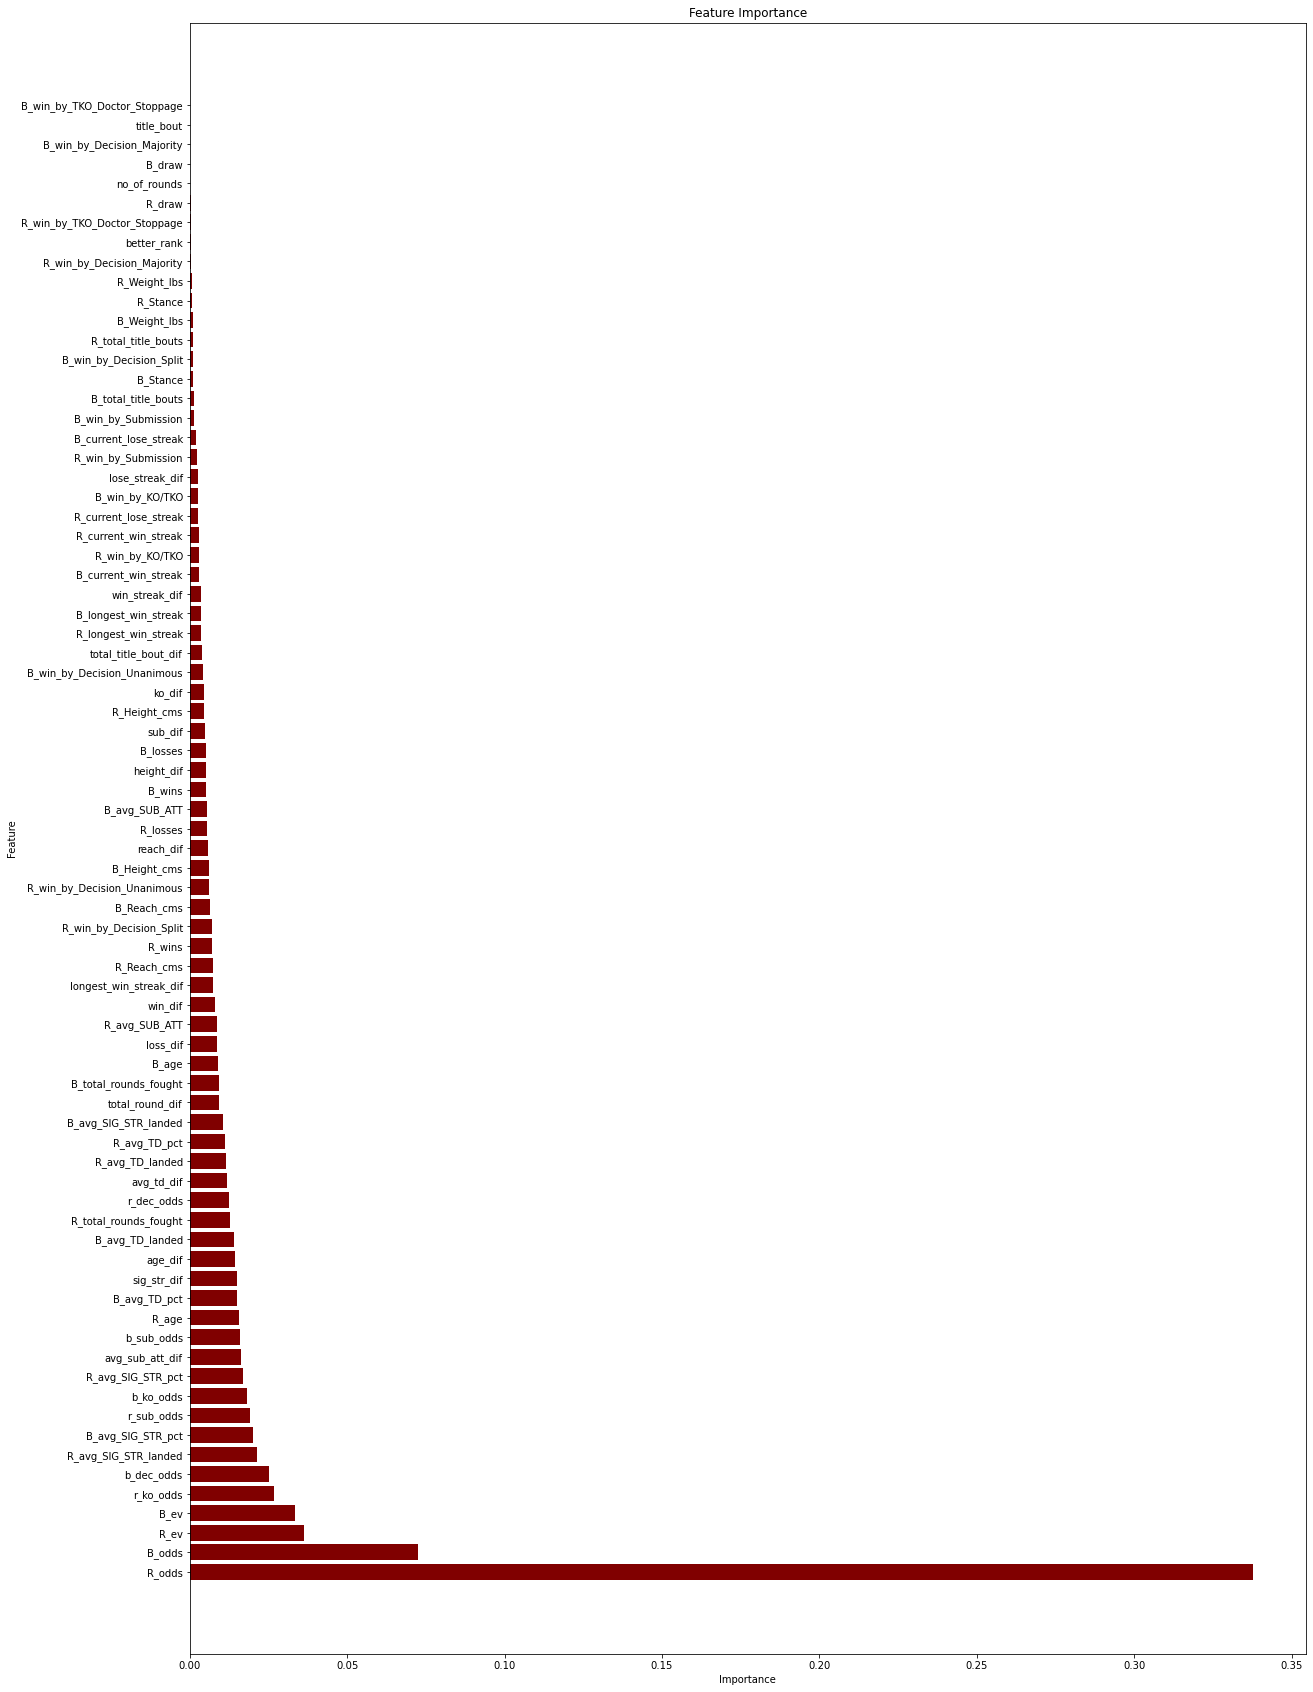

In [30]:
# Bar plot 
plt.figure(figsize=(20, 30))
plt.barh(lightweight_df['Feature'], lightweight_df['Importance'], color ='maroon')

plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");
#plt.savefig('bantamweight_boosting_plot.png')

# WELTERWEIGHT

In [31]:
welterweight_df = welterweight_rf_imp + welterweight_dt_imp + welterweight_b_imp
welterweight_df['Feature'] = welterweight_rf_imp['Feature']
welterweight_df['Importance'] = welterweight_df['Importance'] / sum(welterweight_df['Importance'])
welterweight_df

,Feature,Importance
0,R_odds,0.310411
1,R_ev,0.093536
2,b_dec_odds,0.028225
3,B_ev,0.026404
4,B_odds,0.024925
...,...,...
71,B_win_by_TKO_Doctor_Stoppage,0.000032
72,B_win_by_Decision_Majority,0.000000
73,R_draw,0.000000
74,title_bout,0.000000


In [32]:
welterweight_methods = [rf_scores_f1[4],dt_scores_f1[4],b_scores_f1[4]]
methodswelterweight = [methods,welterweight_methods]

welterweightf1 = pd.DataFrame(methodswelterweight, index=['Welterweight Method', 'F1 Score']).T
welterweightf1

,Welterweight Method,F1 Score
0,Random Forest,0.599861
1,Decision Trees,0.622315
2,Boosting,0.622076


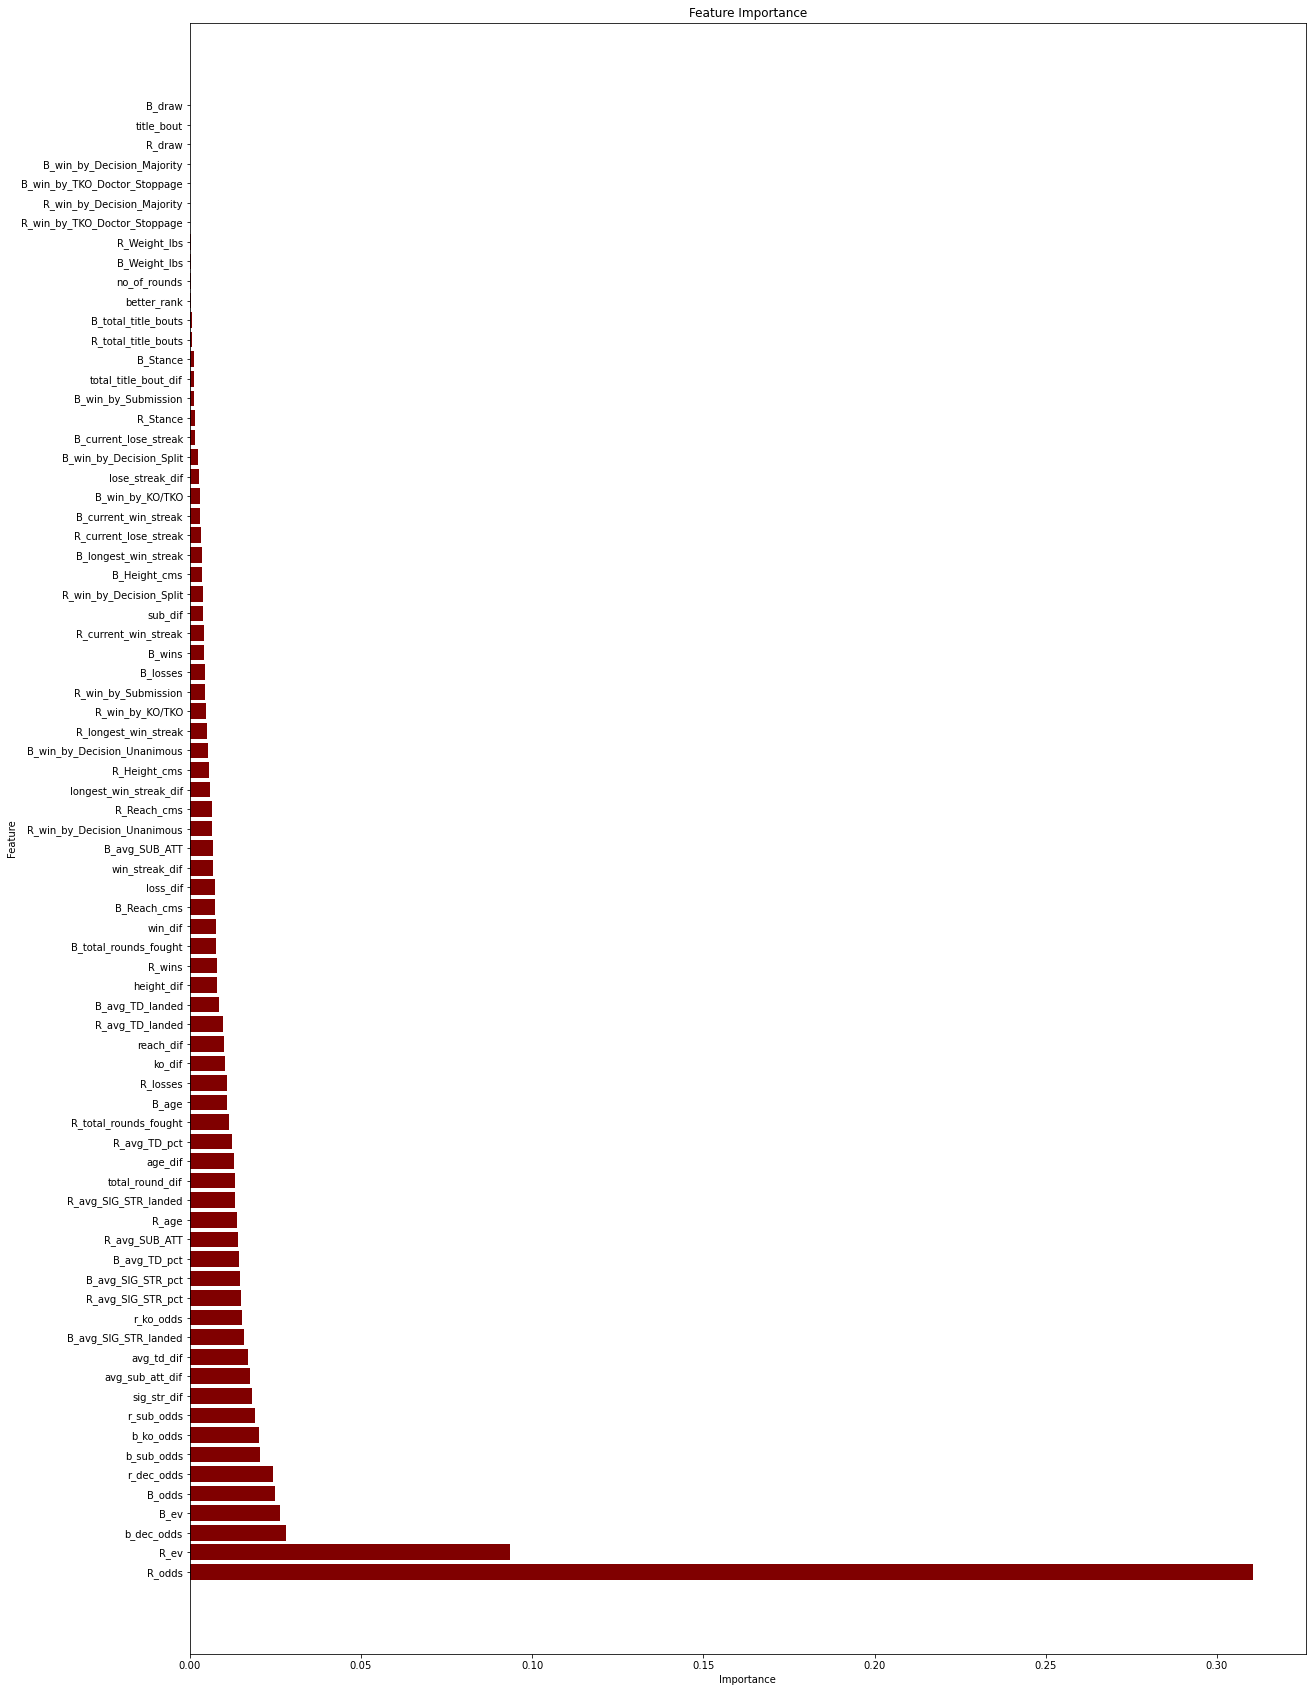

In [33]:
# Bar plot 
plt.figure(figsize=(20, 30))
plt.barh(welterweight_df['Feature'], welterweight_df['Importance'], color ='maroon')

plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");
#plt.savefig('bantamweight_boosting_plot.png')

# MIDDLEWEIGHT

In [34]:
middleweight_df = middleweight_rf_imp + middleweight_dt_imp + middleweight_b_imp
middleweight_df['Feature'] = middleweight_rf_imp['Feature']
middleweight_df['Importance'] = middleweight_df['Importance'] / sum(middleweight_df['Importance'])
middleweight_df

,Feature,Importance
0,R_ev,0.175699
1,sig_str_dif,0.132516
2,B_avg_SUB_ATT,0.116475
3,B_ev,0.024608
4,B_age,0.024519
...,...,...
71,R_draw,0.000082
72,title_bout,0.000044
73,R_win_by_Decision_Majority,0.000000
74,B_win_by_Decision_Majority,0.000000


In [35]:
middleweight_methods = [rf_scores_f1[5],dt_scores_f1[5],b_scores_f1[5]]
methodsmiddleweight = [methods,middleweight_methods]

middleweightf1 = pd.DataFrame(methodsmiddleweight, index=['Middleweight Method', 'F1 Score']).T
middleweightf1

,Middleweight Method,F1 Score
0,Random Forest,0.551011
1,Decision Trees,0.580291
2,Boosting,0.534733


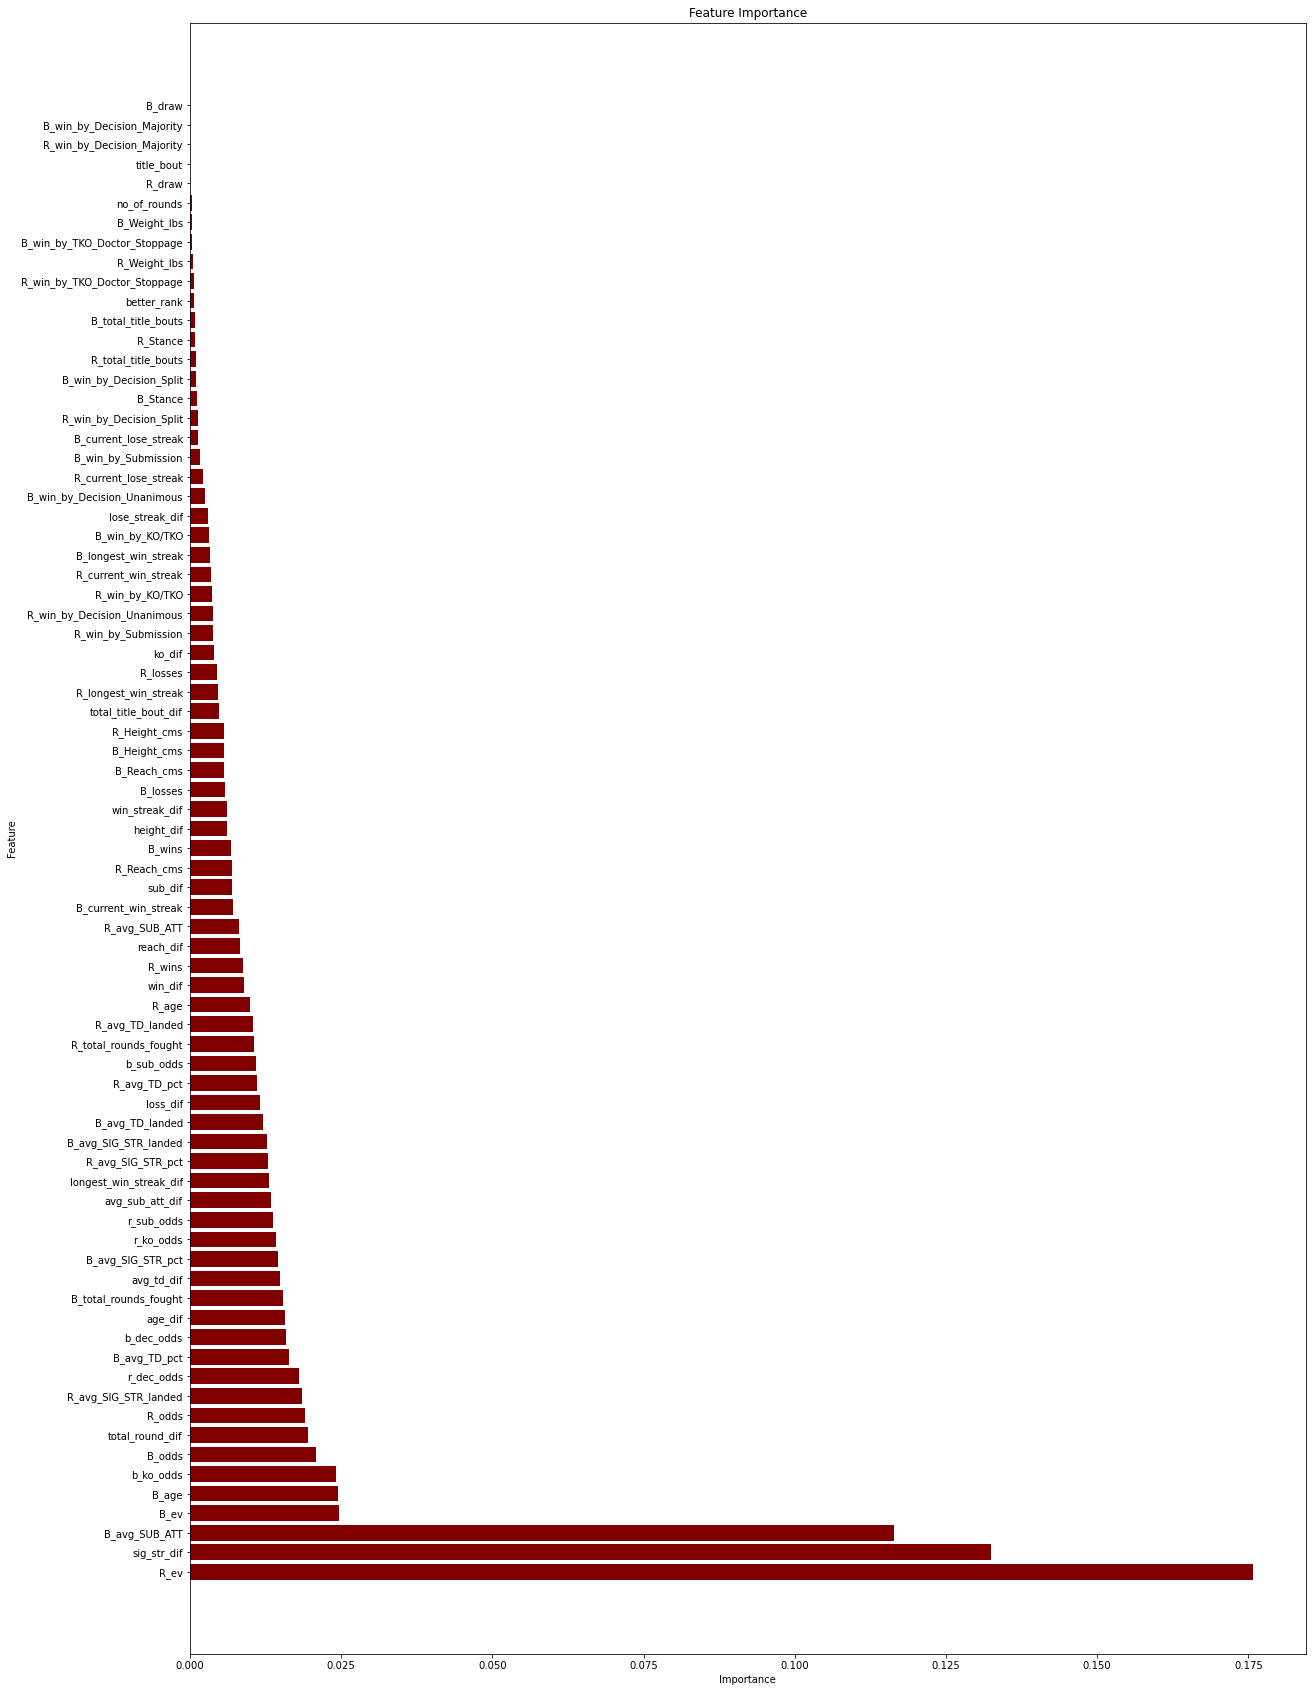

In [36]:
# Bar plot 
plt.figure(figsize=(20, 30))
plt.barh(middleweight_df['Feature'], middleweight_df['Importance'], color ='maroon')

plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");
#plt.savefig('bantamweight_boosting_plot.png')

# LIGHT HEAVYWEIGHT

In [37]:
lightheavyweight_df = lightheavyweight_rf_imp + lightheavyweight_dt_imp + lightheavyweight_b_imp
lightheavyweight_df['Feature'] = lightheavyweight_rf_imp['Feature']
lightheavyweight_df['Importance'] = lightheavyweight_df['Importance'] / sum(lightheavyweight_df['Importance'])
lightheavyweight_df

,Feature,Importance
0,B_odds,0.253133
1,R_odds,0.114965
2,R_ev,0.049910
3,B_ev,0.040292
4,b_ko_odds,0.034043
...,...,...
71,title_bout,0.000000
72,R_draw,0.000000
73,B_win_by_Decision_Majority,0.000000
74,B_draw,0.000000


In [38]:
lightheavyweight_methods = [rf_scores_f1[6],dt_scores_f1[6],b_scores_f1[6]]
methodslightheavyweight = [methods,lightheavyweight_methods]

lightheavyweightf1 = pd.DataFrame(methodslightheavyweight, index=['Light Heavyweight Method', 'F1 Score']).T
lightheavyweightf1

,Light Heavyweight Method,F1 Score
0,Random Forest,0.631731
1,Decision Trees,0.629252
2,Boosting,0.68983


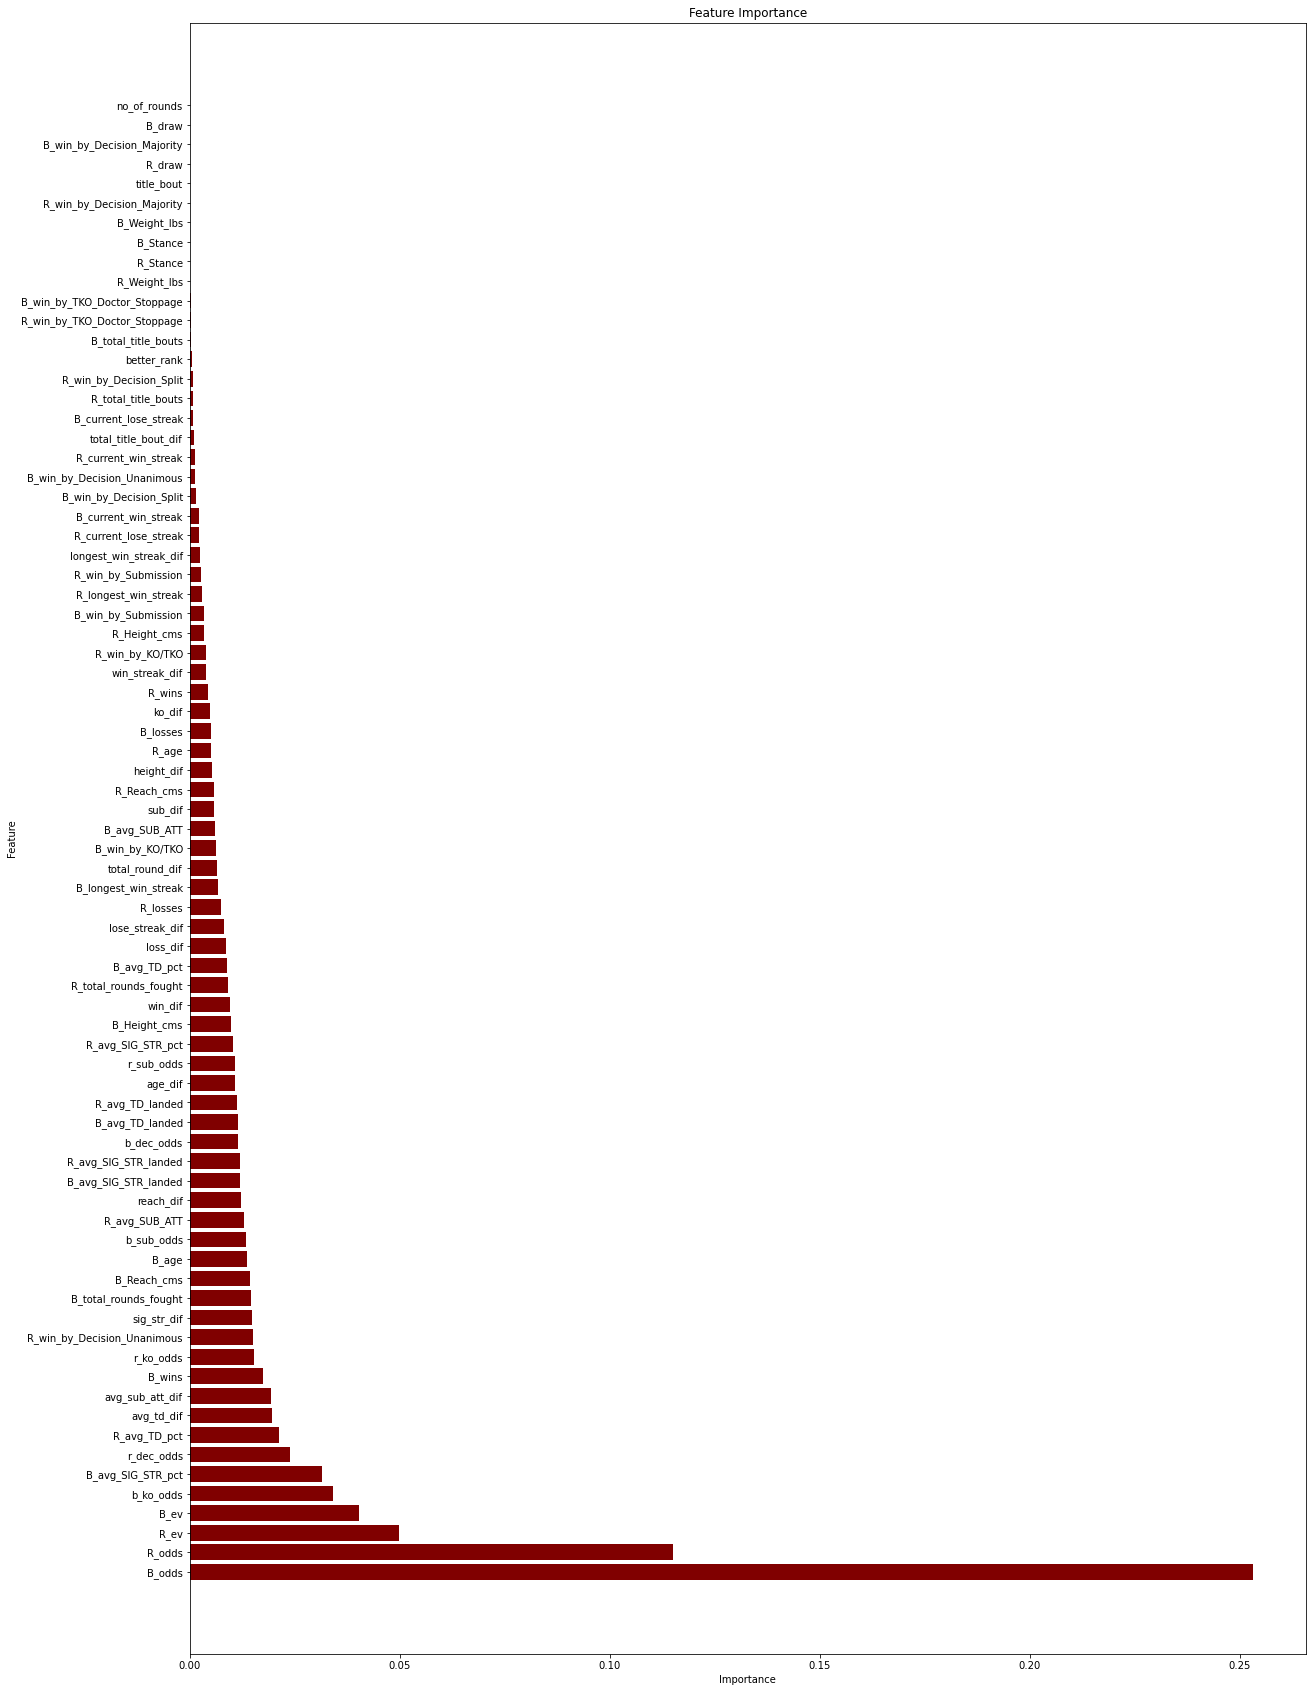

In [39]:
# Bar plot 
plt.figure(figsize=(20, 30))
plt.barh(lightheavyweight_df['Feature'], lightheavyweight_df['Importance'], color ='maroon')

plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");
#plt.savefig('bantamweight_boosting_plot.png')

# HEAVYWEIGHT

In [40]:
heavyweight_df = heavyweight_rf_imp + heavyweight_dt_imp + heavyweight_b_imp
heavyweight_df['Feature'] = heavyweight_rf_imp['Feature']
heavyweight_df['Importance'] = heavyweight_df['Importance'] / sum(heavyweight_df['Importance'])
heavyweight_df

,Feature,Importance
0,B_ev,0.249307
1,R_ev,0.110183
2,B_odds,0.049938
3,R_odds,0.040767
4,b_dec_odds,0.033574
...,...,...
71,title_bout,0.000082
72,B_win_by_Decision_Majority,0.000064
73,R_win_by_TKO_Doctor_Stoppage,0.000000
74,R_draw,0.000000


In [41]:
heavyweight_methods = [rf_scores_f1[7],dt_scores_f1[7],b_scores_f1[7]]
methodsheavyweight = [methods,heavyweight_methods]

heavyweightf1 = pd.DataFrame(methodsheavyweight, index=['Heavyweight Method', 'F1 Score']).T
heavyweightf1

,Heavyweight Method,F1 Score
0,Random Forest,0.588449
1,Decision Trees,0.629252
2,Boosting,0.576989


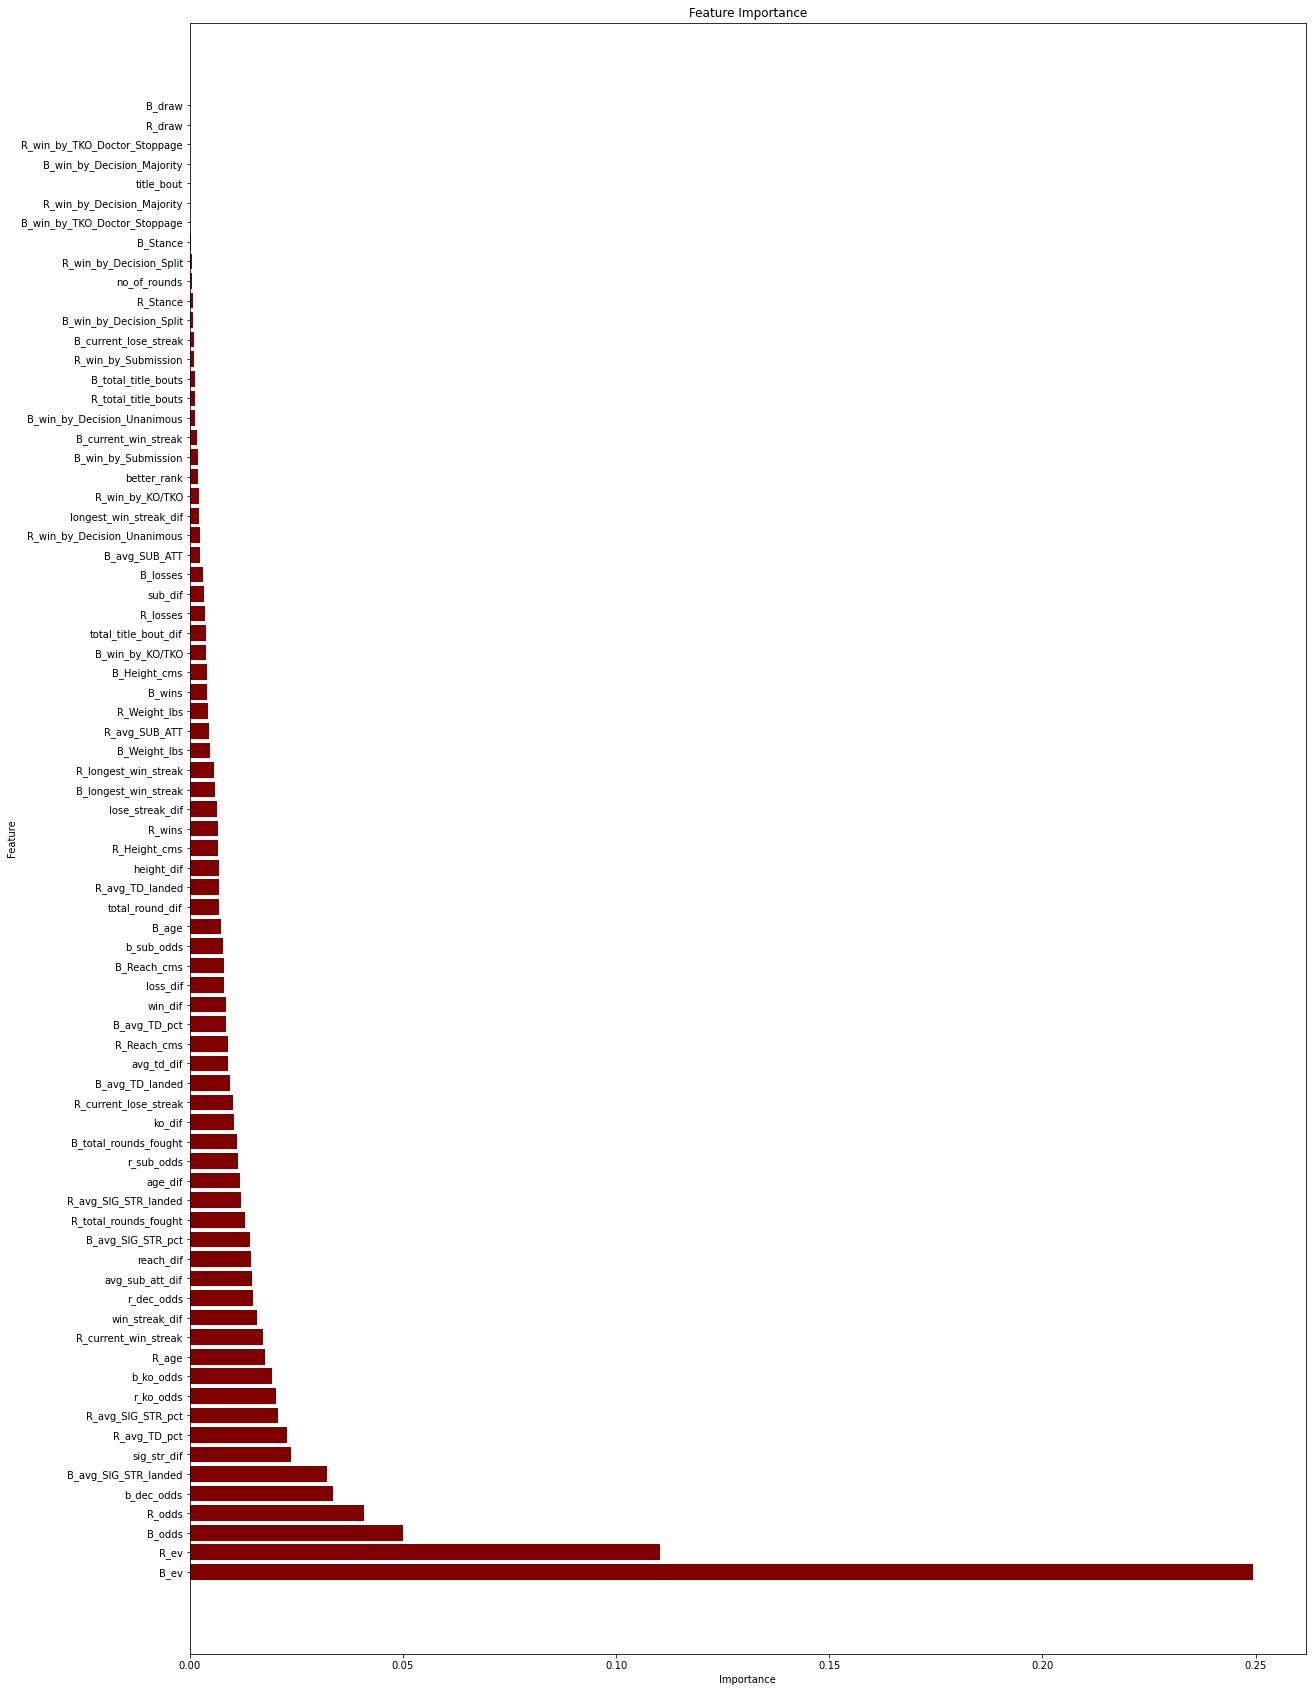

In [42]:
# Bar plot 
plt.figure(figsize=(20, 30))
plt.barh(heavyweight_df['Feature'], heavyweight_df['Importance'], color ='maroon')

plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");
#plt.savefig('bantamweight_boosting_plot.png')

In [43]:
flyweight_df = flyweight_df.sort_values('Feature')
bantamweight_df = bantamweight_df.sort_values('Feature')
featherweight_df = featherweight_df.sort_values('Feature')
lightweight_df = lightweight_df.sort_values('Feature')
welterweight_df = welterweight_df.sort_values('Feature')
middleweight_df = middleweight_df.sort_values('Feature')
lighheavyweight_df = lightheavyweight_df.sort_values('Feature')
heavyweight_df = heavyweight_df.sort_values('Feature')


total_df = flyweight_df + bantamweight_df + featherweight_df + lightweight_df + welterweight_df + middleweight_df + lightheavyweight_df + heavyweight_df
total_df['Feature'] = heavyweight_rf_imp['Feature']
total_df['Importance'] = total_df['Importance'] / sum(total_df['Importance'])
total_imp_df = total_df.copy()
total_df

,Feature,Importance
0,B_ev,0.229117
1,R_ev,0.101199
2,B_odds,0.066907
3,R_odds,0.045285
4,b_dec_odds,0.037850
...,...,...
71,title_bout,0.000055
72,B_win_by_Decision_Majority,0.000030
73,R_win_by_TKO_Doctor_Stoppage,0.000010
74,R_draw,0.000009


In [48]:
total_imp_df

,Feature,Importance
0,B_ev,0.229117
1,R_ev,0.101199
2,B_odds,0.066907
3,R_odds,0.045285
4,b_dec_odds,0.037850
5,B_avg_SIG_STR_landed,0.033277
6,sig_str_dif,0.025358
7,R_avg_TD_pct,0.022012
8,R_avg_SIG_STR_pct,0.019914
9,r_ko_odds,0.018733


# Box plots

In [45]:
flyweight_df = flyweight_df.sort_values('Feature')
bantamweight_df = bantamweight_df.sort_values('Feature')
featherweight_df = featherweight_df.sort_values('Feature')
lightweight_df = lightweight_df.sort_values('Feature')
welterweight_df = welterweight_df.sort_values('Feature')
middleweight_df = middleweight_df.sort_values('Feature')
lighheavyweight_df = lightheavyweight_df.sort_values('Feature')
heavyweight_df = heavyweight_df.sort_values('Feature')
total_df = total_df.sort_values('Feature')

boxplot_df = flyweight_df
boxplot_df.columns = ['Feature','Flyweight Imp']
boxplot_df['Bantweight Imp'] = bantamweight_df['Importance']
boxplot_df['Featherweight Imp'] = featherweight_df['Importance']
boxplot_df['Lightweight Imp'] = lightweight_df['Importance']
boxplot_df['Welterweight Imp'] = welterweight_df['Importance']
boxplot_df['Middleweight Imp'] = middleweight_df['Importance']
boxplot_df['Light Heavyweight Imp'] = lighheavyweight_df['Importance']
boxplot_df['Heavyweight Imp'] = heavyweight_df['Importance']

boxplot_df['Total Importance'] = total_df['Importance']

boxplot_df

,Feature,Flyweight Imp,Bantweight Imp,Featherweight Imp,Lightweight Imp,Welterweight Imp,Middleweight Imp,Light Heavyweight Imp,Heavyweight Imp,Total Importance
51,B_Height_cms,0.002716,0.002807,0.002521,0.003041,0.003595,0.003546,0.002584,0.003106,0.002989
34,B_Reach_cms,0.007366,0.006510,0.006413,0.006418,0.007465,0.007121,0.007361,0.006909,0.006945
64,B_Stance,0.000857,0.000797,0.000630,0.000961,0.000543,0.000786,0.000345,0.000725,0.000705
61,B_Weight_lbs,0.001388,0.001065,0.000969,0.001080,0.001233,0.000971,0.000706,0.001126,0.001067
1,B_age,0.094701,0.084033,0.107234,0.072419,0.093536,0.132516,0.114965,0.110183,0.101199
...,...,...,...,...,...,...,...,...,...,...
70,title_bout,0.000056,0.000171,0.000000,0.000282,0.000118,0.000302,0.000000,0.000092,0.000128
27,total_round_dif,0.011147,0.008748,0.008581,0.008629,0.009893,0.010617,0.010215,0.008989,0.009602
49,total_title_bout_dif,0.003126,0.003103,0.002680,0.003503,0.003864,0.003841,0.003269,0.003558,0.003368
44,win_dif,0.004138,0.004153,0.003485,0.004650,0.004613,0.004771,0.004752,0.004220,0.004348


In [46]:
boxplot_df = boxplot_df.sort_values('Total Importance',ascending = False)
boxplot_df = boxplot_df.loc[0:10]
total_df = total_df.loc[0:10]
boxplot_df['Feature'] = total_df['Feature']
boxplot_df

,Feature,Flyweight Imp,Bantweight Imp,Featherweight Imp,Lightweight Imp,Welterweight Imp,Middleweight Imp,Light Heavyweight Imp,Heavyweight Imp,Total Importance
0,B_ev,0.181769,0.177150,0.147849,0.337615,0.310411,0.175699,0.253133,0.249307,0.229117
1,R_ev,0.094701,0.084033,0.107234,0.072419,0.093536,0.132516,0.114965,0.110183,0.101199
2,B_odds,0.084748,0.080657,0.089180,0.036126,0.028225,0.116475,0.049910,0.049938,0.066907
3,R_odds,0.071925,0.057339,0.067413,0.033534,0.026404,0.024608,0.040292,0.040767,0.045285
4,b_dec_odds,0.044649,0.054650,0.059817,0.026620,0.024925,0.024519,0.034043,0.033574,0.037850
5,NaN,0.028100,0.046055,0.054812,0.025094,0.024328,0.024084,0.031547,0.032197,0.033277
6,NaN,0.020158,0.032387,0.040202,0.021309,0.020436,0.020866,0.023869,0.023634,0.025358
7,R_avg_TD_pct,0.019516,0.022886,0.029761,0.020145,0.020202,0.019456,0.021330,0.022797,0.022012
8,R_avg_SIG_STR_pct,0.018496,0.022433,0.020814,0.019217,0.019104,0.019094,0.019560,0.020592,0.019914
9,NaN,0.016806,0.020219,0.018603,0.018191,0.018052,0.018608,0.019272,0.020115,0.018733


In [82]:
boxplot_df_t = boxplot_df.transpose()

boxplot_df_t = boxplot_df_t.drop(boxplot_df_t.index[0])

boxplot_df_t

,0,1,2,3,4,5,6,7,8,9,10
Flyweight Imp,0.181769,0.094701,0.084748,0.071925,0.044649,0.0281,0.020158,0.019516,0.018496,0.016806,0.016393
Bantweight Imp,0.17715,0.084033,0.080657,0.057339,0.05465,0.046055,0.032387,0.022886,0.022433,0.020219,0.019156
Featherweight Imp,0.147849,0.107234,0.08918,0.067413,0.059817,0.054812,0.040202,0.029761,0.020814,0.018603,0.018162
Lightweight Imp,0.337615,0.072419,0.036126,0.033534,0.02662,0.025094,0.021309,0.020145,0.019217,0.018191,0.017021
Welterweight Imp,0.310411,0.093536,0.028225,0.026404,0.024925,0.024328,0.020436,0.020202,0.019104,0.018052,0.017624
Middleweight Imp,0.175699,0.132516,0.116475,0.024608,0.024519,0.024084,0.020866,0.019456,0.019094,0.018608,0.017969
Light Heavyweight Imp,0.253133,0.114965,0.04991,0.040292,0.034043,0.031547,0.023869,0.02133,0.01956,0.019272,0.017374
Heavyweight Imp,0.249307,0.110183,0.049938,0.040767,0.033574,0.032197,0.023634,0.022797,0.020592,0.020115,0.019214
Total Importance,0.229117,0.101199,0.066907,0.045285,0.03785,0.033277,0.025358,0.022012,0.019914,0.018733,0.017864


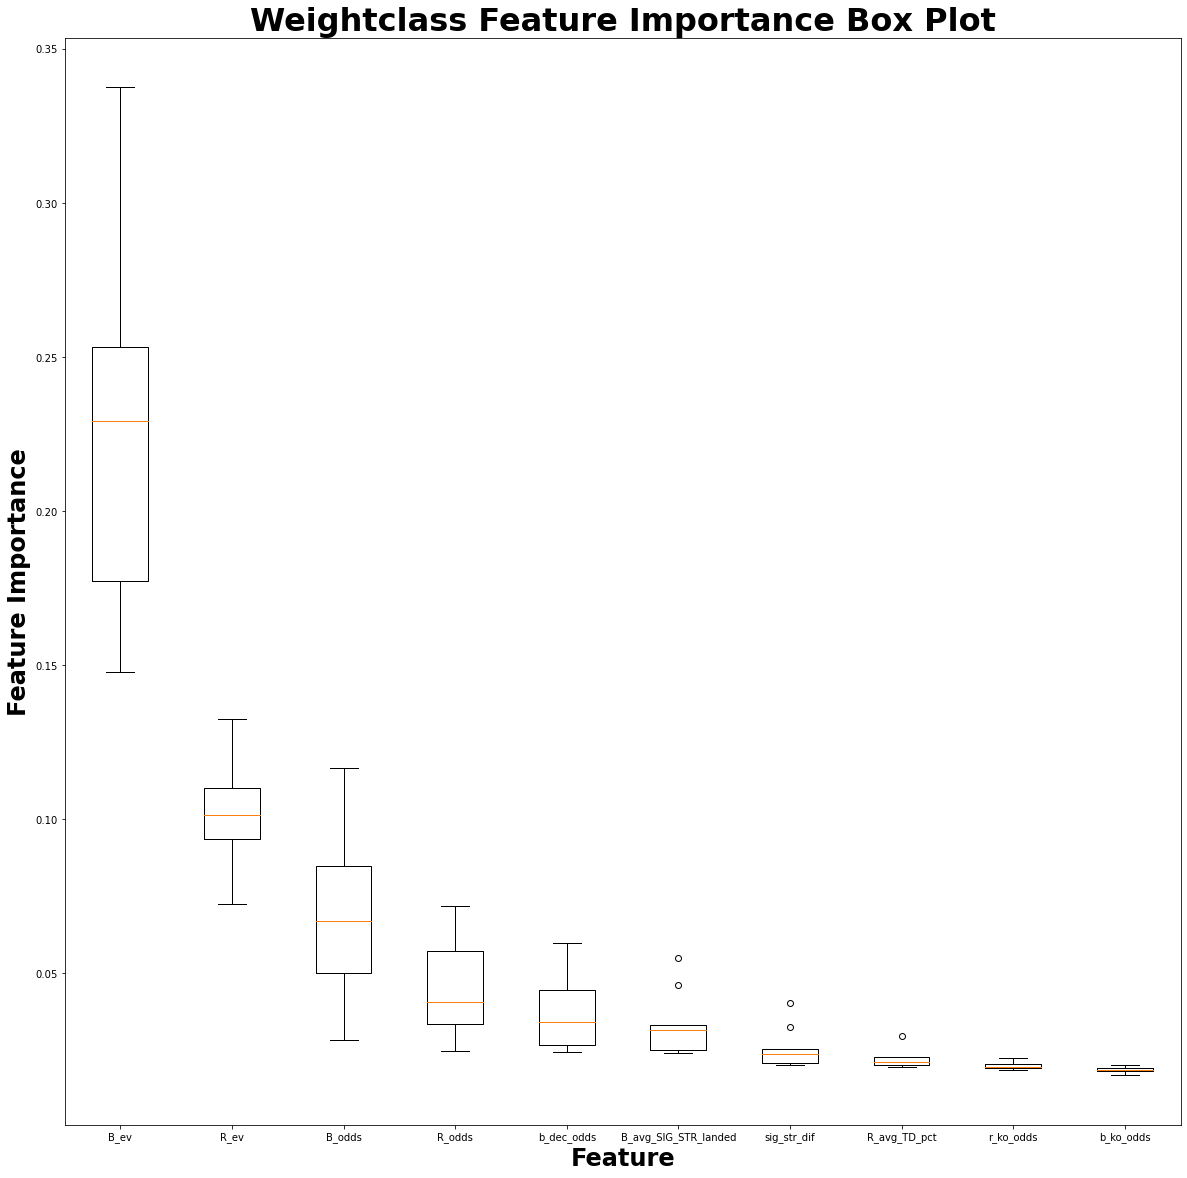

In [100]:
import matplotlib.pyplot as plt


B_ev = boxplot_df_t[0]
R_ev = boxplot_df_t[1]
B_odds = boxplot_df_t[2]
R_odds = boxplot_df_t[3] 
b_dec_odds = boxplot_df_t[4]
B_avg_SIG_STR_landed = boxplot_df_t[5] 
sig_str_dif = boxplot_df_t[6] 
R_avg_TD_pct = boxplot_df_t[7] 
r_ko_odds = boxplot_df_t[8]
b_ko_odds = boxplot_df_t[9]

box_plot_data = [B_ev,R_ev,B_odds,R_odds,b_dec_odds,B_avg_SIG_STR_landed,sig_str_dif,R_avg_TD_pct,r_ko_odds,b_ko_odds]
plt.figure(figsize=(20, 20))
plt.boxplot(box_plot_data)


plt.title('Weightclass Feature Importance Box Plot',fontweight='bold',fontsize = '32')
plt.xlabel('Feature',fontweight='bold',fontsize = '24')
plt.ylabel('Feature Importance',fontweight='bold',fontsize = '24')



plt.xticks([1, 2, 3, 4, 5, 6, 7, 8,9,10], ['B_ev', 'R_ev', 'B_odds', 'R_odds', 'b_dec_odds', 'B_avg_SIG_STR_landed', 'sig_str_dif', 'R_avg_TD_pct','r_ko_odds','b_ko_odds'])
plt.show()

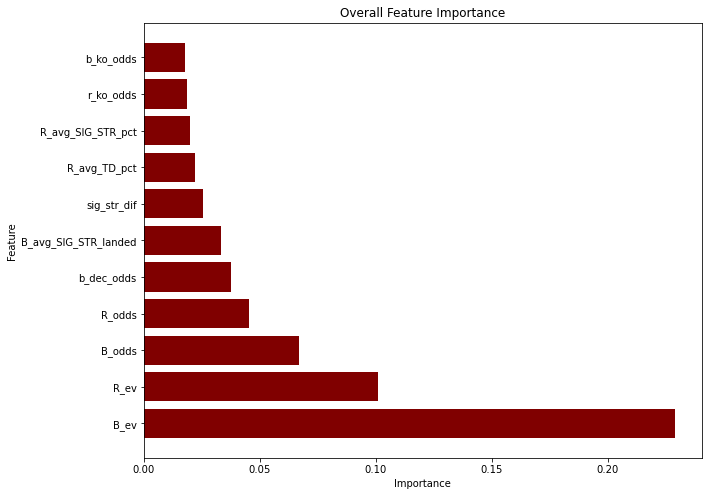

In [65]:
# Bar plot 

plt.figure(figsize=(10, 8))
plt.barh(total_imp_df['Feature'], total_imp_df['Importance'], color ='maroon')

plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Overall Feature Importance");
#plt.savefig('bantamweight_boosting_plot.png')